# Regression

Regression, a technique within machine learning, examines relationships within historical data to predict future outcomes. This entails utilizing structured historical data, devoid of randomness, and employing complex machine learning algorithms to train predictive models.

In [1]:
import pandas as pd  # Library for tabular data manipulation and analysis
import numpy as np  # Library for numerical operations and array computation
import matplotlib.pyplot as plt  # Library for data visualization and plotting
import seaborn as sns  # Library for statistical data visualization with an easy-to-use interface
from sklearn.linear_model import LinearRegression  # Class for building linear regression models
from sklearn.model_selection import train_test_split  # Function for splitting datasets into training and testing data
from sklearn.preprocessing import StandardScaler  # Transformer for data preprocessing, scaling, and feature adjustment
from sklearn.preprocessing import MinMaxScaler  # Transformer for data preprocessing, scaling, and feature adjustment
from sklearn.metrics import mean_absolute_error  # Evaluation metric to assess regression model performance
from sklearn.metrics import mean_absolute_percentage_error  # Evaluation metric to assess regression model performance
from sklearn.metrics import mean_squared_error  # Evaluation metric to assess regression model performance
from sklearn.metrics import r2_score  # Evaluation metric to assess regression model performance

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Data
df = pd.read_csv('Dataset/Salary.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [4]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

### Exploratory Data Analysis

"Exploratory Data Analysis" (EDA) is an essential initial phase in data analysis, aiming to understand the dataset's main characteristics, uncover patterns, and identify potential relationships between variables.

In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


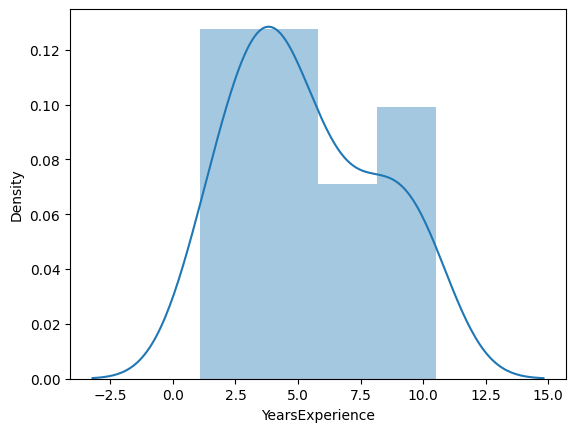

In [6]:
sns.distplot(df['YearsExperience']);

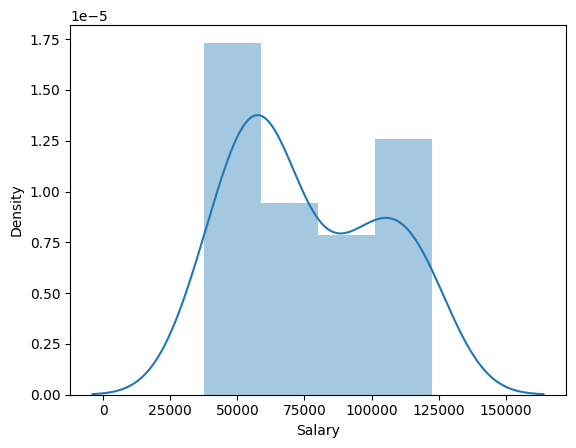

In [7]:
sns.distplot(df['Salary']);

## Preprocessing Modelling


"Preprocessing Modelling" is a stage in the machine learning model development process where the data used for training the model is prepared and modified before the model is built. This stage is crucial to ensure that the data used is of good quality and suitable for the model's needs.

In [8]:
x = df.drop(['Salary'], axis = 1)
y = df['Salary']

In [9]:
# Splitting Training and Test Set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 1/3, random_state = 42)

## Machine Learning Regression - Simple Linear Regression

"Machine Learning Regression - Simple Linear Regression" uses a basic technique to predict continuous outcomes by modeling the relationship between one independent and one dependent variable with a linear equation. It involves data prep, model training, evaluation, and prediction. This approach is foundational in regression analysis, finding applications across fields for understanding and predicting variable relationships.

In [10]:
# Fitting Into Train
regressor = LinearRegression()

In [11]:
regressor.fit(x_train, y_train)

LinearRegression()

In [12]:
regressor.coef_

array([9337.63985893])

In [13]:
# Predict the result
y_pred = regressor.predict(x_test)

In [14]:
# Plot The Result
result = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})

In [15]:
result

,Actual,Predict
27,112635.0,117549.897898
15,67938.0,73662.990561
23,113812.0,104477.202095
17,83088.0,77398.046504
8,64445.0,57789.002801
9,57189.0,62457.822730
28,122391.0,124086.245799
24,109431.0,109146.022025
12,56957.0,65259.114688
0,39343.0,38179.959097


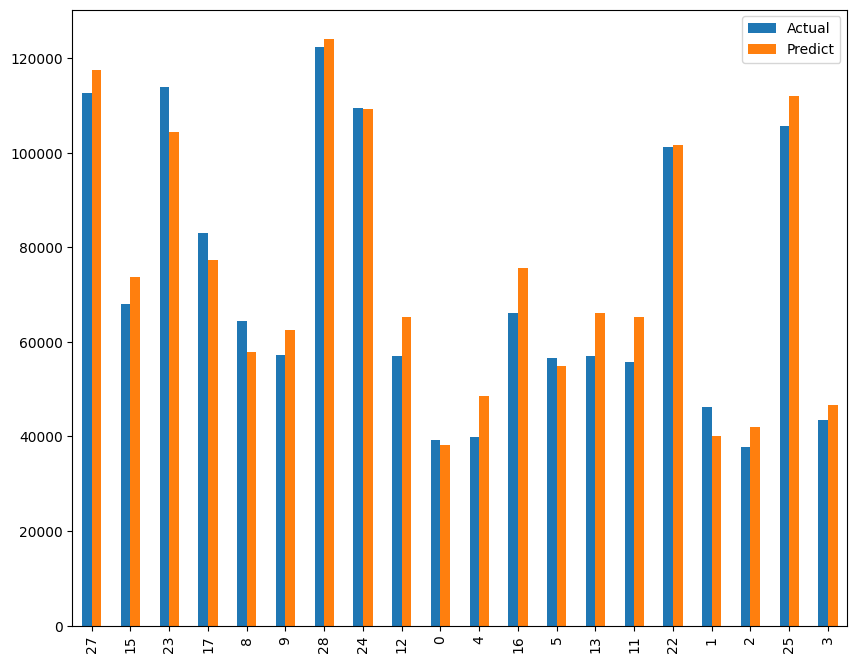

In [16]:
result.plot(kind = 'bar', figsize = (10,8))
plt.show()

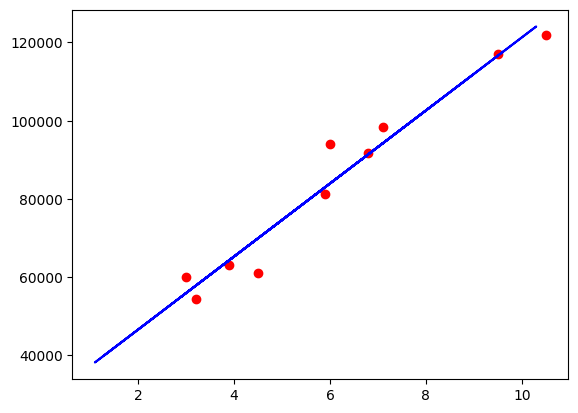

In [17]:
plt.scatter(x_train, y_train, color='red')

plt.plot(x_test.values, y_pred, color='blue')

plt.show()

## Evaluate Model


"Evaluate Model" refers to the process of assessing the performance and accuracy of a machine learning model. This step is crucial to determine how well the model generalizes to new, unseen data and whether it meets the desired criteria for deployment.

In [18]:
np.sqrt(mean_squared_error(y_test, y_pred))

6189.04643388471

In [19]:
mean_absolute_error(y_test, y_pred)

5373.379510407302

In [20]:
mean_absolute_percentage_error(y_test, y_pred)

0.08804898617394863

In [21]:
r2_score(y_test, y_pred)

0.9504877087663546